In [39]:
#### Agglomeration of communities ####

import pandas as pd 
import os 
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
# Find datafile
file = 'Rphenograph_output_275clusters_k250_16ct_fractions.csv'

# Get current directory
path = os.getcwd()
data_path = path + '/Data/'

# Set path 
output_dir = f"{data_path}/clustering/"

data = pd.read_csv(f"{data_path}/phenograph_output/{file}", index_col=0)

# rename cells to be consistent
ct_order = ['Cl Mo','Int Mo', 'Non-Cl Mo', 'DC',  'Neutrophil', 'T other', 'Tc', 'Th', 'Treg', 'Unknown']

# Harmonize cell type names and get rid of spaces
data['source_cluster'] = data['source_cluster'].replace({'T other':'T_other','Non-Cl Mo':'Non-Cl_Mo','Int Mo':'Int_Mo','Cl Mo':'Cl_Mo','Cl MAC':'Cl_Mac','Alt MAC':'Alt_Mac', 'NK cell':'NK','DCs cell':'DC','Neutrophils':'Neutrophil','B cell': 'B', 'Endothelial cell': 'Endothelial', 'Mast cell':'Mast'})
data.rename(columns={'T.other':'T_other','Non.Cl.Mo':'Non-Cl_Mo','Int.Mo':'Int_Mo','Cl.Mo':'Cl_Mo','Cl.MAC':'Cl_Mac','Alt.Mac':'Alt_Mac', 'DCs.cell':'DC', 'Mast.cell':'Mast', 'Endothelial.cell': 'Endothelial', 'B.cell': 'B', 'NK.cell': 'NK', 'Neutrophils':'Neutrophil'}, inplace=True)
data.to_csv(f"{data_path}/clustering/full_cd_275c_renamed.csv", index = False)
# df_clus.to_csv(f"{data_path}/clustering/full_cd_clus_19_39_48.csv", index = False)

df = data.iloc[:,3:]


In [72]:
data = pd.read_csv(f"{data_path}/clustering/full_cd_clus_21_40_49.csv").drop(columns={"cluster", "agglomerateto_21", "agglomerateto_49", "surv_5y"})
# Take only cells from community 26 or 27
data = data[data['agglomerateto_40'].isin([26,27])].drop(columns={"agglomerateto_40"})


pi = pd.read_excel('Data/raw/LUAD Clinical Data.xlsx').rename(columns = {'Key':'Patient_ID', 'Survival or loss to follow-up (years)':'survival'})[['Patient_ID', 'survival']]

data  = pd.merge(data, pi, on='Patient_ID', how='inner')

df = data.iloc[:,3:]

x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x

,Alt.MAC,B,Cancer,Cl_Mac,Cl_Mo,DC,Endothelial,Int_Mo,Mast,NK,Neutrophil,Non-Cl_Mo,T_other,Tc,Th,Treg,Unknown
0,0.166667,0.000000,0.166667,0.166667,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.083333,0.000000,0.0,0.083333,0.000000,0.0,0.0,0.083333,0.0,0.083333,0.083333,0.250000,0.000000,0.333333
2,0.000000,0.166667,0.000000,0.166667,0.333333,0.0,0.166667,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.166667,0.000000,0.000000,0.000000
3,0.000000,0.076923,0.000000,0.153846,0.076923,0.0,0.153846,0.000000,0.0,0.0,0.000000,0.0,0.076923,0.153846,0.153846,0.000000,0.153846
4,0.000000,0.000000,0.000000,0.000000,0.333333,0.0,0.000000,0.166667,0.0,0.0,0.000000,0.0,0.000000,0.333333,0.000000,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430739,0.000000,0.000000,0.000000,0.285714,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.285714,0.142857,0.285714
430740,0.333333,0.166667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.166667,0.166667,0.000000,0.166667
430741,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.250000,0.125000,0.000000,0.125000
430742,0.000000,0.000000,0.000000,0.375000,0.000000,0.0,0.125000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.375000,0.000000,0.125000


In [74]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

pca = PCA(n_components=17)  # For example, reduce to 2 components
X_pca = pca.fit_transform(X_scaled)


In [75]:
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


Explained variance ratio: [1.06806669e-01 9.00044411e-02 6.75511501e-02 6.47814450e-02
 6.37481806e-02 6.06667171e-02 6.01513192e-02 5.95724017e-02
 5.92535048e-02 5.80427143e-02 5.67728058e-02 5.60667535e-02
 5.30104351e-02 5.22207552e-02 4.98939453e-02 4.14567616e-02
 8.50347358e-31]


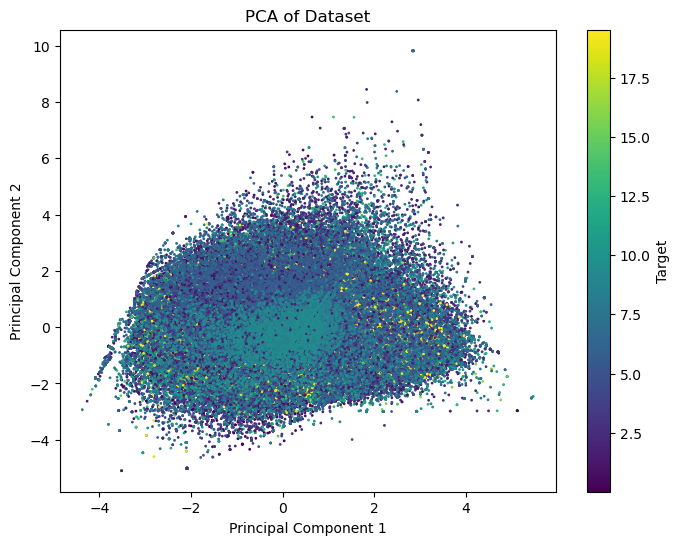

In [77]:
plt.figure(figsize=(8, 6))

# PC components to visualize
pcs = [1, 2]

plt.scatter(X_pca[:, pcs[0]], X_pca[:, pcs[1]], c=y, cmap='viridis',  s=1)
plt.xlabel(f'Principal Component {pcs[0]}')
plt.ylabel(f'Principal Component {pcs[1]}')
plt.title('PCA of Dataset')
plt.colorbar(label='Target')
plt.show()


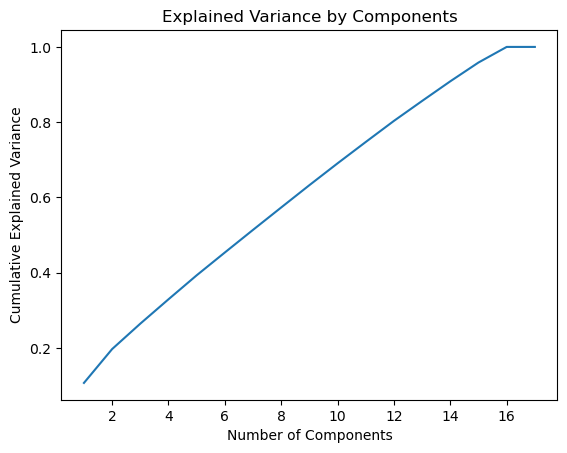

In [79]:
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()


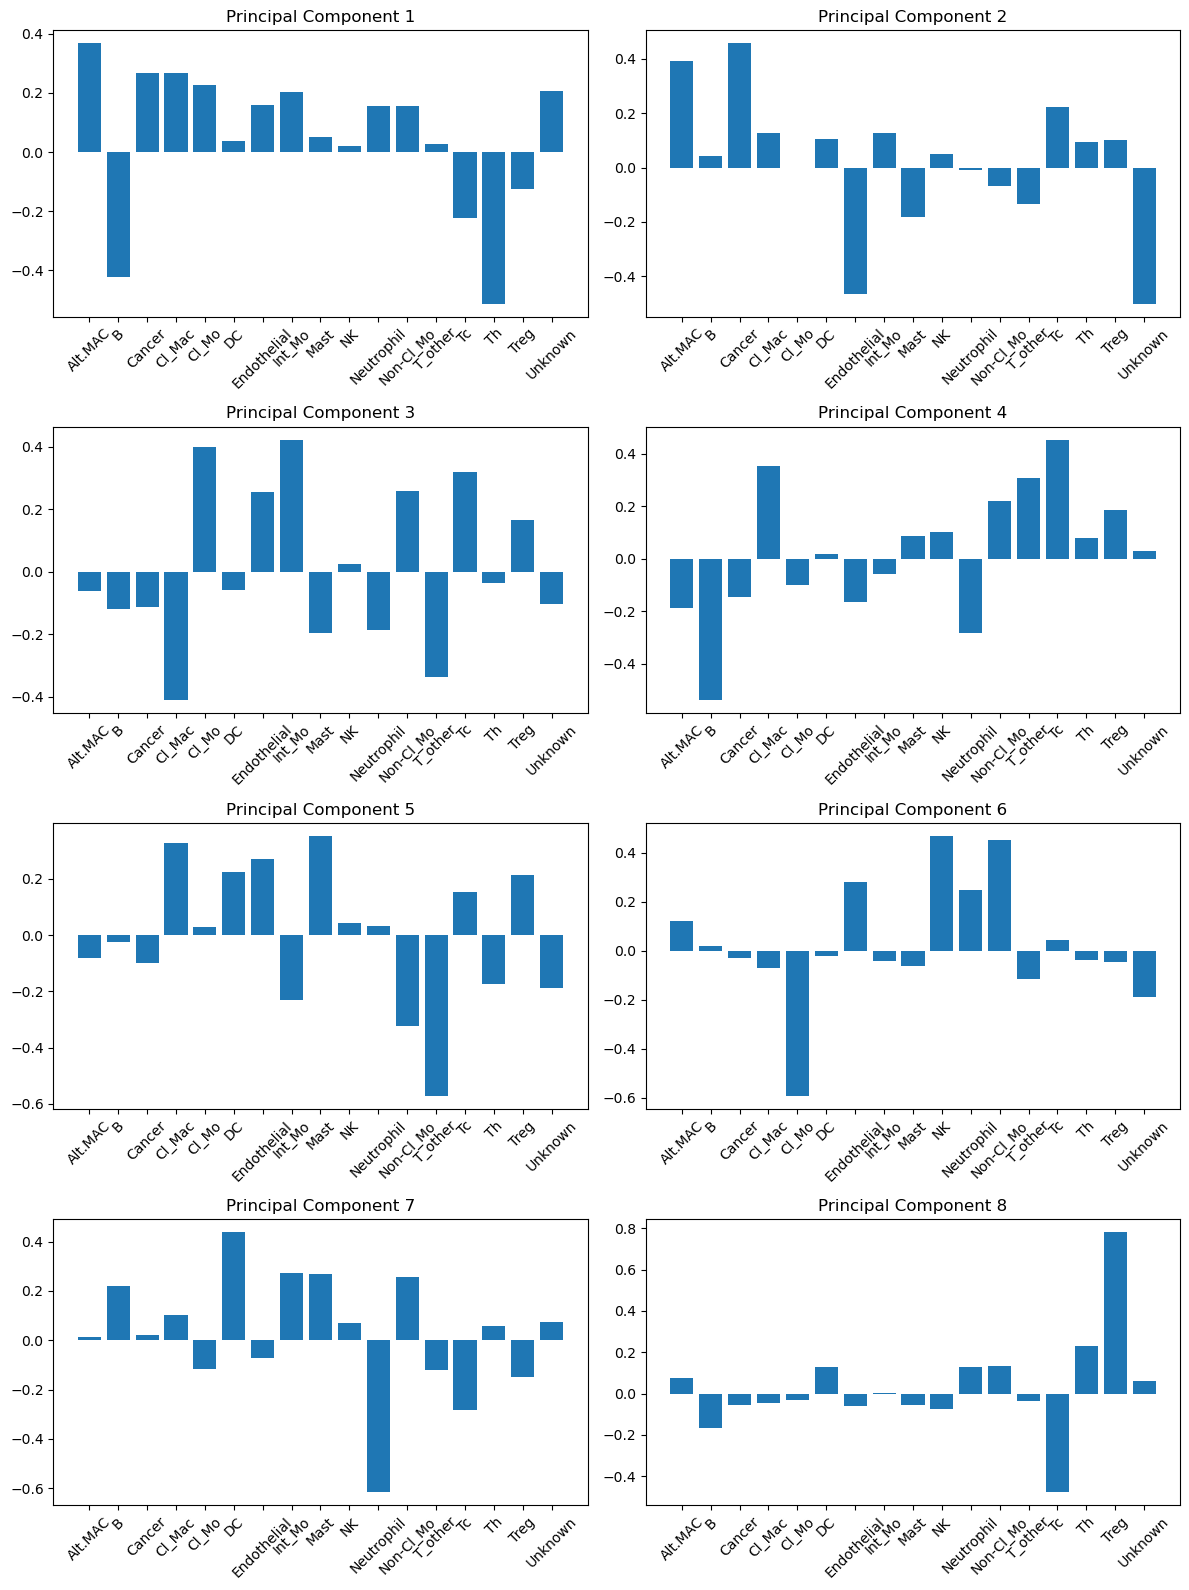

In [80]:
import matplotlib.pyplot as plt

def plot_loadings(loadings, feature_names, n_components=8):
    plt.figure(figsize=(12, 16))
    for i in range(n_components):
        plt.subplot(4, 2, i + 1)
        plt.bar(range(len(feature_names)), loadings[i], tick_label=feature_names)
        plt.title(f'Principal Component {i + 1}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


loadings = pca.components_
feature_names = x.columns
plot_loadings(loadings, feature_names)
